### <left><span style='color:green'>House Sale Prediction using Advanced Regression </span></left>

### Problem Statement - Part I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

- The company wants to know:

1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

#### Objective of the Project


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Procedures to solve this business problem

- Step 1 : Import Libraries and Packages
- Step 2 : Read in Data
- Step 3 : Desribe Data
- Step 4 : Clean Data and Validation
- Step 5 : Data Preperation
- Step 6 : Understand Data using Exploratory Data Analysis (EDA)
- Step 7 : Training the model
- Step 8 : Model Prediction and Evaluation
- Step 9 : Redge and Lasso Regularization
- Step 10 : Conclusions and Results

# Step 1. Import Libraries and Packages

In [222]:
import pandas as pd #Data Processing
import numpy as np #Linear Algebra
import seaborn as sns #Data Visualization
import matplotlib.pyplot as plt #Data Visualization

import warnings #Warnings
warnings.filterwarnings ("ignore") #Warnings

# Step 2. Read in Data

In [223]:
df_house = pd.read_csv("train.csv") #reading in the CSV file as dataframe
df_house.head() #diplaying the 1st five rows of  dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Step 3. Describe Data

In [224]:
#Find out the number of rows and columns for the data
df_house.shape

(1460, 81)

##### Updates : There are 1460 Rows and 81 Columns in the Dataset.

In [225]:
#Get the information about this dataset
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [226]:
#Describe the data with means, std, quartiles, etc.
df_house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# Step 4. Clean and Validate Data

## 4.1 Check Duplicate Rows

In [227]:
# By default, for each set of duplicated values, the first occurrence is set on False and all others are True.
print("The total number of Duplicate Rows are/is" , df_house.duplicated().sum())

The total number of Duplicate Rows are/is 0


##### Updates : There are No Duplicate rows in the Dataset.

## 4.2 Check all Rows and Columns for NULL values

In [228]:
#Figure out if there are missing values (i.e., NULL) from all Rows and Columns 
print("The number of missing Rows are" , df_house.isnull().all(axis=1).sum())
print("The number of missing Columns are" , df_house.isnull().all(axis=0).sum())

The number of missing Rows are 0
The number of missing Columns are 0


In [229]:
#Check the Percentage of NUll Values from each variable
pd.set_option('display.max_rows', None)# to display all the rows
100*df_house.isnull().mean().sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

#### Removing columns which have more than 30 % missing values as they are not beneficial, because even if we impute them, most of the values remain same and which will not help in our analysis.

In [230]:
#make a list of the columns that have high percentage of missing values that will be removed
remov_cols=[]
for i in df_house.columns:
    if(df_house[i].isnull().mean()*100>=30.00):
        remov_cols.append(i)
        
print("The columns below are removed from the Dataset :\n")
print(remov_cols)

The columns below are removed from the Dataset :

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [231]:
# Remove these columns
df_house.drop(remov_cols,axis=1,inplace=True)
df_house.shape# verifying the shape of the dataset

(1460, 76)

In [232]:
#As mentioned in the Data Dictionary NA value means it is not present and thus we can replace it with none
null_with_meaning = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for i in null_with_meaning:
    df_house[i].fillna("none", inplace=True)

In [233]:
# replace the null with median for LotFrontage, MasVnrArea, and GarageYrBlt columns
df_house["LotFrontage"].fillna(df_house["LotFrontage"].median(), inplace=True)
df_house["MasVnrArea"].fillna(df_house["MasVnrArea"].median(), inplace=True)
df_house["GarageYrBlt"].fillna(df_house["GarageYrBlt"].median(), inplace=True)

In [234]:
# Fill in the Electrical with the mode
df_house['Electrical'] = df_house['Electrical'].fillna(df_house['Electrical'].mode()[0])

In [235]:
#Validate the null values again
100*df_house.isnull().mean().sort_values(ascending=False)

Id               0.0
FullBath         0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
BsmtHalfBath     0.0
MSSubClass       0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
CentralAir       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
YearBuilt        0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope    

##### Updates : No Missing values can be found in the Dataset now.

In [236]:
# Let's drop the ID column as it is NOT avaiable for any analysis
df_house=df_house.drop('Id',axis='columns')

# Step 5 : Data Preperation

## 5.1 Round off to 2 decimal places for all columns 

In [237]:
df_house = df_house.round(decimals = 2)

## 5.2 Create Derived Variables

In [238]:
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
df_house['Total_sqr_footage'] = (df_house['BsmtFinSF1'] + df_house['BsmtFinSF2'] + df_house['1stFlrSF'] + df_house['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
df_house['Total_Bathrooms'] = (df_house['FullBath'] + (0.5 * df_house['HalfBath']) + df_house['BsmtFullBath'] + (0.5 * df_house['BsmtHalfBath']))
#Creating derived column for total porch area 
df_house['Total_porch_sf'] = (df_house['OpenPorchSF'] + df_house['3SsnPorch'] + df_house['EnclosedPorch'] + df_house['ScreenPorch'] + df_house['WoodDeckSF'])


In [239]:
#Then drop these extra columns once for those had been summed up in one column
extraCols = ['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF']
df_house.drop(extraCols,axis=1,inplace=True)
df_house.shape# verifying the shape of the dataset

(1460, 65)

## 5.3 Check the unique data of each Column

In [240]:
for i in df_house.columns :
    print(i,"\n")
    print(df_house[i].value_counts(),"\n")
    print("****************************************")

MSSubClass 

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

****************************************
MSZoning 

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

****************************************
LotFrontage 

69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
24.0      19
68.0      19
64.0      19
73.0      18
55.0      17
63.0      17
72.0      17
79.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
43.0      12
67.0      12
40.0      12
57.0      12
76.0      11
34.0      10
53.0      10
86.0      10
92.0      10
88.0      10
44.0       9
84.0       9
35.0       9
62.0       9
77.0       9
93.0       8
98.0       8

In [241]:
# As we can observe many variables/columns have only 1 value with maximum frequency
#Let's drops the columns where the highest frequeny is >= 90%
ninty_percent = 1460*0.90 #1460 is the total number of rows
ninty_percent

1314.0

In [242]:
dropCols = [] 
for i in df_house.columns :
    if df_house[i].value_counts().max() >= ninty_percent:
        dropCols.append(i)
print(dropCols)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscVal']


In [243]:
# Remove these columns
df_house.drop(dropCols,axis=1,inplace=True)
df_house.shape# verifying the shape of the dataset

(1460, 50)

In [244]:
# Create three new Columns to compute the ages of the properties
df_house['Total_Age']=df_house['YrSold']-df_house['YearBuilt']
df_house['Garage_age'] = df_house['YrSold'] - df_house['GarageYrBlt']
df_house['Remodel_age'] = df_house['YrSold'] - df_house['YearRemodAdd']

In [245]:
#Also let's drop variables like GarageYrBlt and YearRemodAdd which had been used for calculations above
drop_cols = ['GarageYrBlt','YearRemodAdd']
df_house.drop(labels = drop_cols, axis = 1, inplace=True) #Drop the columns, which will be listed
print("The new size of the data is" , df_house.shape) #Print the new Dataset Shape

The new size of the data is (1460, 51)


## 5.4 Check the unique data on each Column

In [246]:
for i in df_house.columns :
    print(i,"\n")
    print(df_house[i].value_counts(),"\n")
    print("****************************************")

MSSubClass 

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

****************************************
MSZoning 

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

****************************************
LotFrontage 

69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
24.0      19
68.0      19
64.0      19
73.0      18
55.0      17
63.0      17
72.0      17
79.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
43.0      12
67.0      12
40.0      12
57.0      12
76.0      11
34.0      10
53.0      10
86.0      10
92.0      10
88.0      10
44.0       9
84.0       9
35.0       9
62.0       9
77.0       9
93.0       8
98.0       8

##### Updates: All columns should have good data formats as well as datatypes

# Step 6. Conduct Exploratory Data Analysis ( EDA )

In [247]:
#Separete variables/columns based on numerical/continous and categorical
Cat_cols = []
Num_cols = []
for i in df_house.columns :
    if df_house[i].dtype == "object":
        Cat_cols.append(i)
    else:
        Num_cols.append(i)
print("Below are the list of",len(Cat_cols) ,"Categorical Columns are :\n")
print(Cat_cols,"\n")
print("Below are the list of",len(Num_cols) ,"Numerical Columns are :\n")
print(Num_cols)

Below are the list of 27 Categorical Columns are :

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition'] 

Below are the list of 24 Numerical Columns are :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


## 6.1 Conduct Univariate Analysis for Catagorical variables/columns

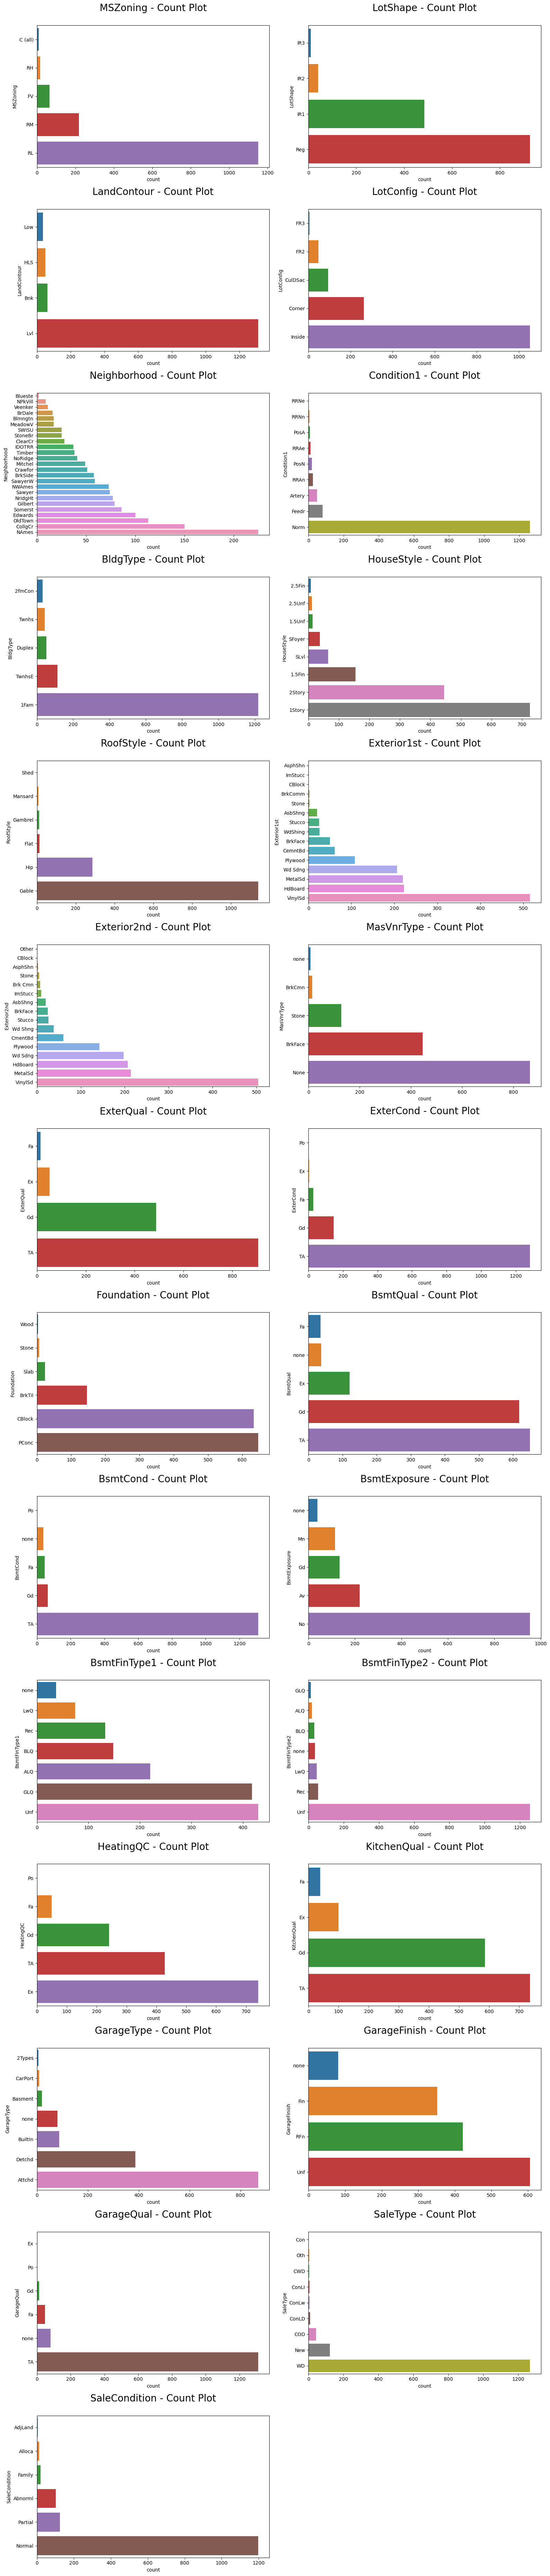

In [248]:
#Let's plot all categorical variables/columns
plt.figure(figsize=(16,90))#The size of the plot
c=0
for i in Cat_cols:
    c=c+1
    plt.subplot(17,2,c)
    sns.countplot(y=df_house[str(i)],order=df_house[str(i)].value_counts().sort_values().index)
    plt.title(str(i)+" - Count Plot\n",fontsize=20)#The title of the plot
plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

## 6.2 Check Outliers | Univariate Analysis of the Continous columns

In [249]:
#Let's first check the data in terms of percentile
df_house.describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt   MasVnrArea    BsmtUnfSF  TotalBsmtSF    GrLivArea  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   103.117123   567.240411  1057.429452  1515.463699  ...   
std      30.202904   180.731373   441.866955   438.705324   525.480383  ...   
min    1872.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%    1954.000000     0.000000   223.000000   795.750000  1129.500000  ...   
50%    1973.000000     0.000000   477.500000   991.500000  1464.000000  ...   
75%    2000.000000   164.250000   808.000000  1298.250000  1776.750000  ...   
90%    2006.000000   335.000000  1232.000000  1602.200000  2158.300000  ...   
95%    2007.000000   456.000000  1468.000000  1753.000000  2466.100000  ...   
99%    2009.000000   791.280000  1797.050000  2155.050000  3123.480000  ...   
max    2010.000000  1600.000000  2336.000000  6110.000000  5642.000000  ...   

        GarageArea       MoSold       YrSold      SalePrice  \
count  1460.000000  1460.000000  1460.000000    1460.000000   
mean    472.980137     6.321918  2007.815753  180921.195890   
std     213.804841     2.703626     1.328095   79442.502883   
min       0.000000     1.000000  2006.000000   34900.000000   
25%     334.500000     5.000000  2007.000000  129975.000000   
50%     480.000000     6.000000  2008.000000  163000.000000   
75%     576.000000     8.000000  2009.000000  214000.000000   
90%     757.100000    10.000000  2010.000000  278000.000000   
95%     850.100000    11.000000  2010.000000  326100.000000   
99%    1002.790000    12.000000  2010.000000  442567.010000   
max    1418.000000    12.000000  2010.000000  755000.000000   

       Total_sqr_footage  Total_Bathrooms  Total_porch_sf    Total_Age  \
count        1460.000000      1460.000000     1460.000000  1460.000000   
mean         1999.808219         2.210616      181.329452    36.547945   
std           773.992942         0.785399      156.656097    30.250152   
min           334.000000         1.000000        0.000000     0.000000   
25%          1493.000000         2.000000       45.000000     8.000000   
50%          1863.500000         2.000000      164.000000    35.000000   
75%          2383.500000         2.500000      266.000000    54.000000   
90%          3023.100000         3.500000      382.000000    84.000000   
95%          3334.150000         3.500000      472.150000    91.000000   
99%          4107.510000         4.000000      670.000000   110.410000   
max         11286.000000         6.000000     1027.000000   136.000000   

        Garage_age  Remodel_age  
count  1460.000000  1460.000000  
mean     29.226712    22.950000  
std      24.034844    20.640653  
min       0.000000    -1.000000  
25%       7.000000     4.000000  
50%      28.000000    14.000000  
75%      46.000000    41.000000  
90%      61.000000    56.000000  
95%      78.000000    58.000000  
99%      90.000000    60.000000  
max     107.000000    60.000000  

[11 rows x 24 columns]

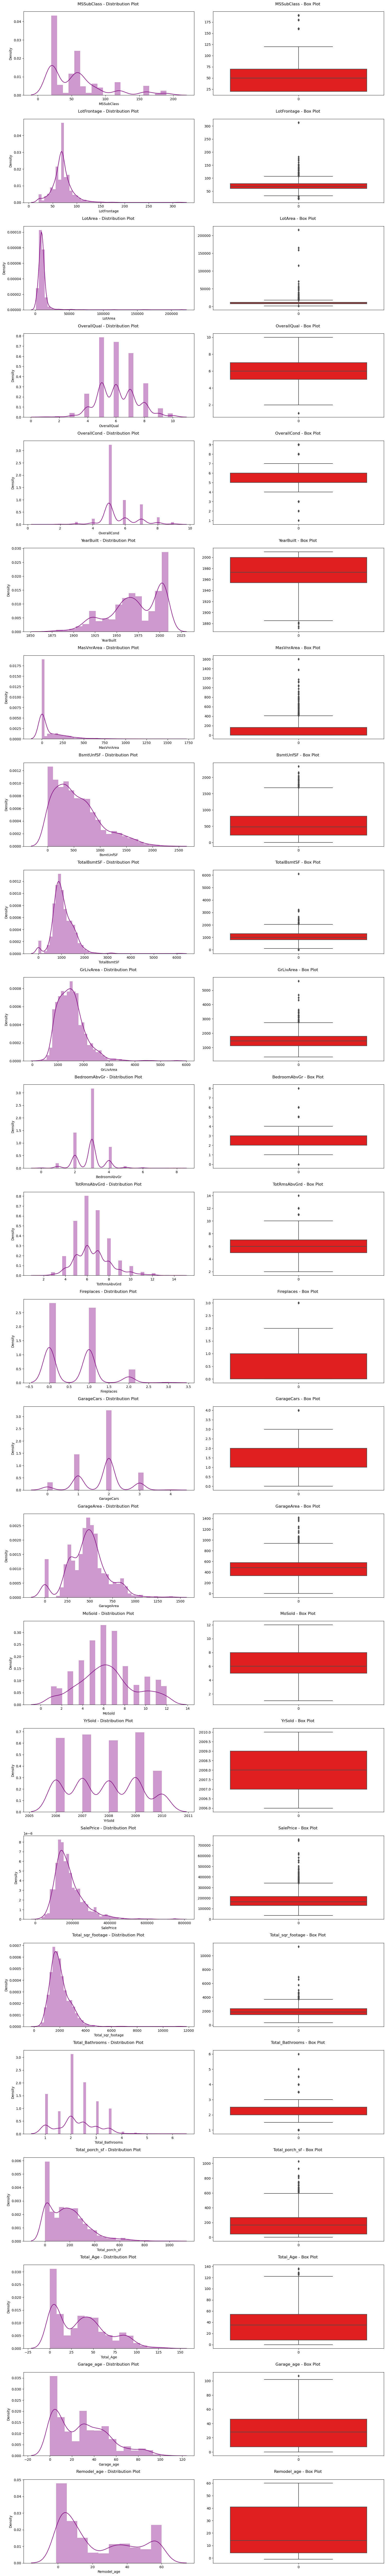

In [250]:
#Let's plot all the numerical columns and check the outliers
plt.figure(figsize=(16,110))#The size of the plot
c=0
for i in Num_cols:
    c=c+1
    plt.subplot(25,2,c)
    plt.title(str(i)+" - Distribution Plot \n")
    sns.distplot(df_house[str(i)], color='purple')
    c=c+1
    plt.subplot(25,2,c)
    plt.title(str(i)+" - Box Plot \n")
    sns.boxplot(df_house[str(i)], color='red')
plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

In [251]:
#As we can observe there are outlier in many columns, listing them below
outlier = ['LotFrontage','LotArea','MasVnrArea','GrLivArea','Total_sqr_footage','Total_porch_sf']
for i in outlier:
    qnt = df_house[i].quantile(0.95)#removing data above 99 percentile
    df_house = df_house[df_house[i] < qnt]
     #qnt01 = df_house[i].quantile(0.01)#removing data below 1 percentile

In [252]:
#Lets observe the new shape of the data
df_house.shape

(1067, 51)

#### There are still some Outliers existing in some more variables, but we will not drop them as it might lead to data loss. The outliers will be treated during min-max (normalisation) scaling as removing handling outliers could lead us to data loss. 

## 6.3 Conduct Bivariate Analysis for Categorical variable columns

#### The Target Variable is **`SalePrice`** and will be compared with other variables
#### Box Plot will be used to analyze the relationship between Target variable and other Categorical variables

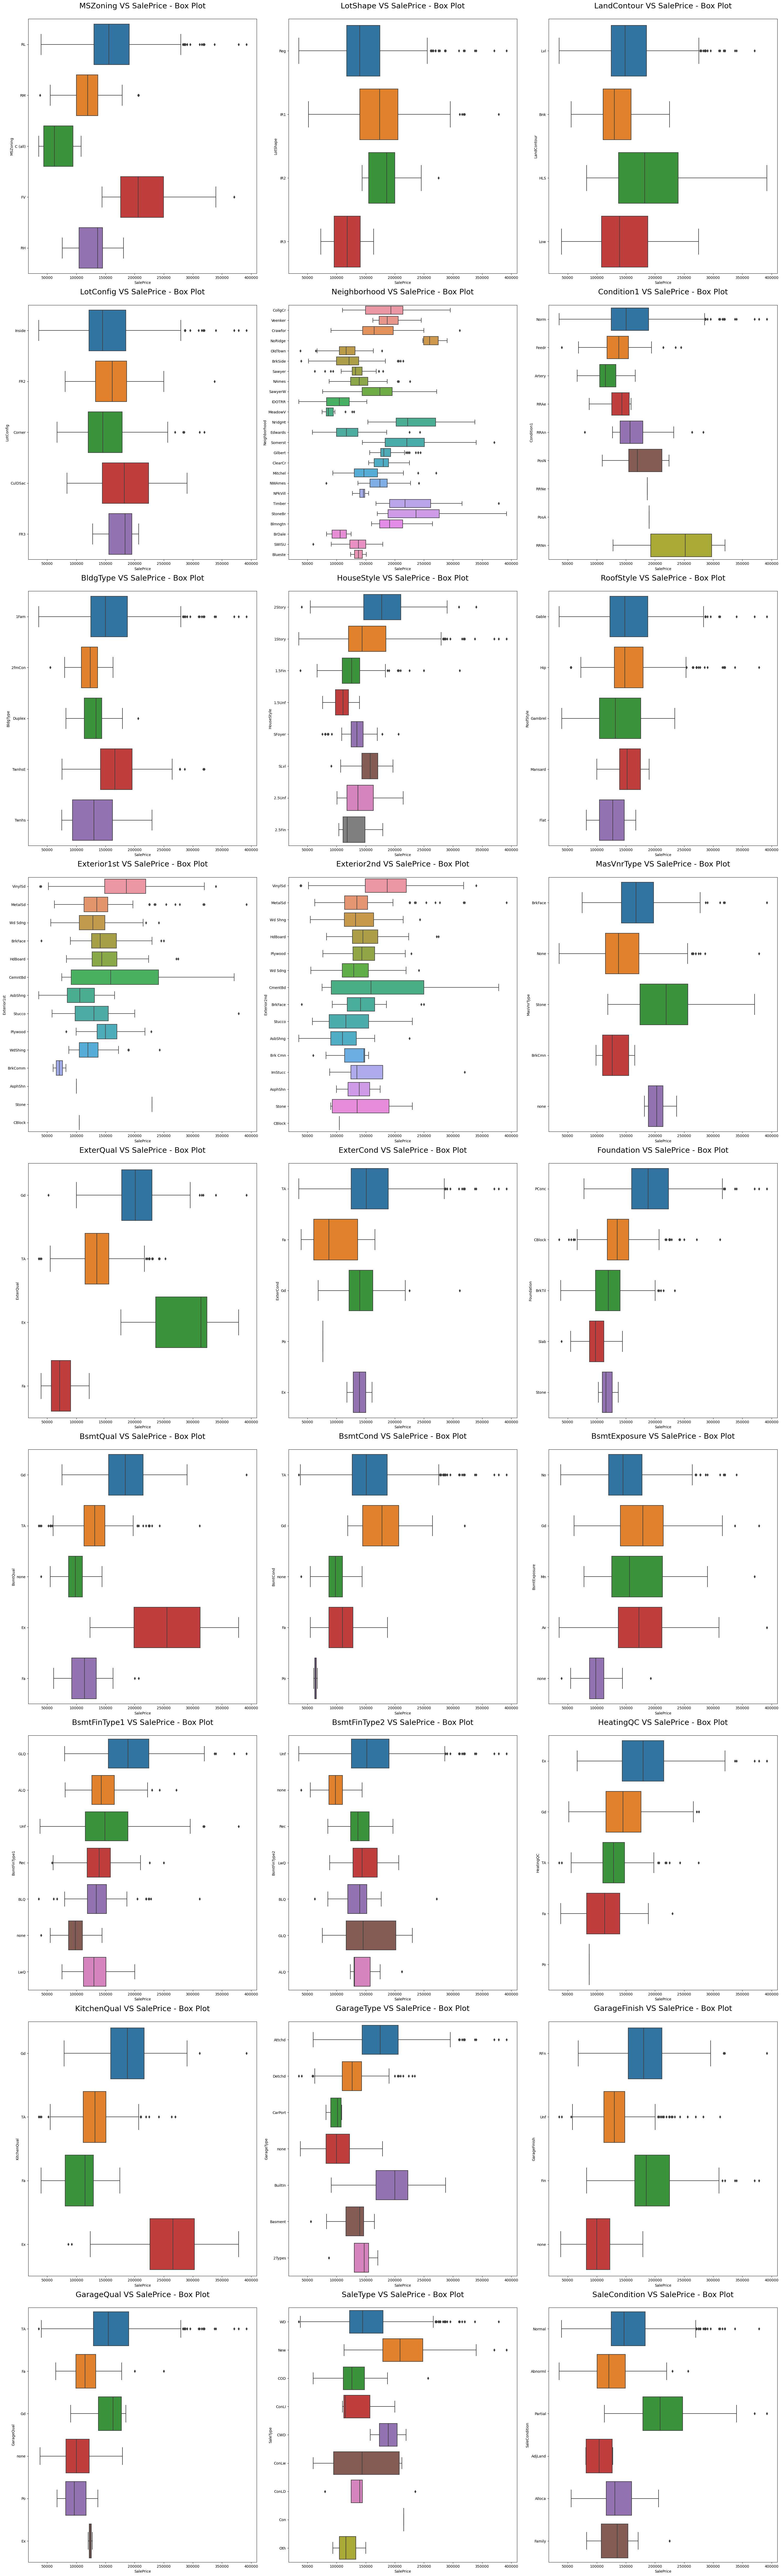

In [253]:
#Let's plot SalePrice against all the categorical variables/columns
plt.figure(figsize=(30,120))#The size of the plot
c=0
for i in Cat_cols:
    c=c+1
    plt.subplot(11,3,c)
    sns.boxplot(x = 'SalePrice', y = df_house[str(i)], data = df_house)
    plt.title(str(i)+" VS SalePrice - Box Plot\n",fontsize=21)#The title of the plot    
plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

## 6.4 Conduct Bivariate Analysis for the Continous variables/columns

#### The Pair Plot will be used to analyze relationship between Target variable **`SalePrice`** and other Continous variables

In [254]:
important_num_cols = list(df_house.corr()["SalePrice"][(df_house.corr()["SalePrice"]>0.50) | (df_house.corr()["SalePrice"]<-0.50)].index)
important_num_cols

['OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'Total_sqr_footage',
 'Total_Bathrooms',
 'Total_Age',
 'Garage_age',
 'Remodel_age']

<Figure size 7000x9000 with 0 Axes>

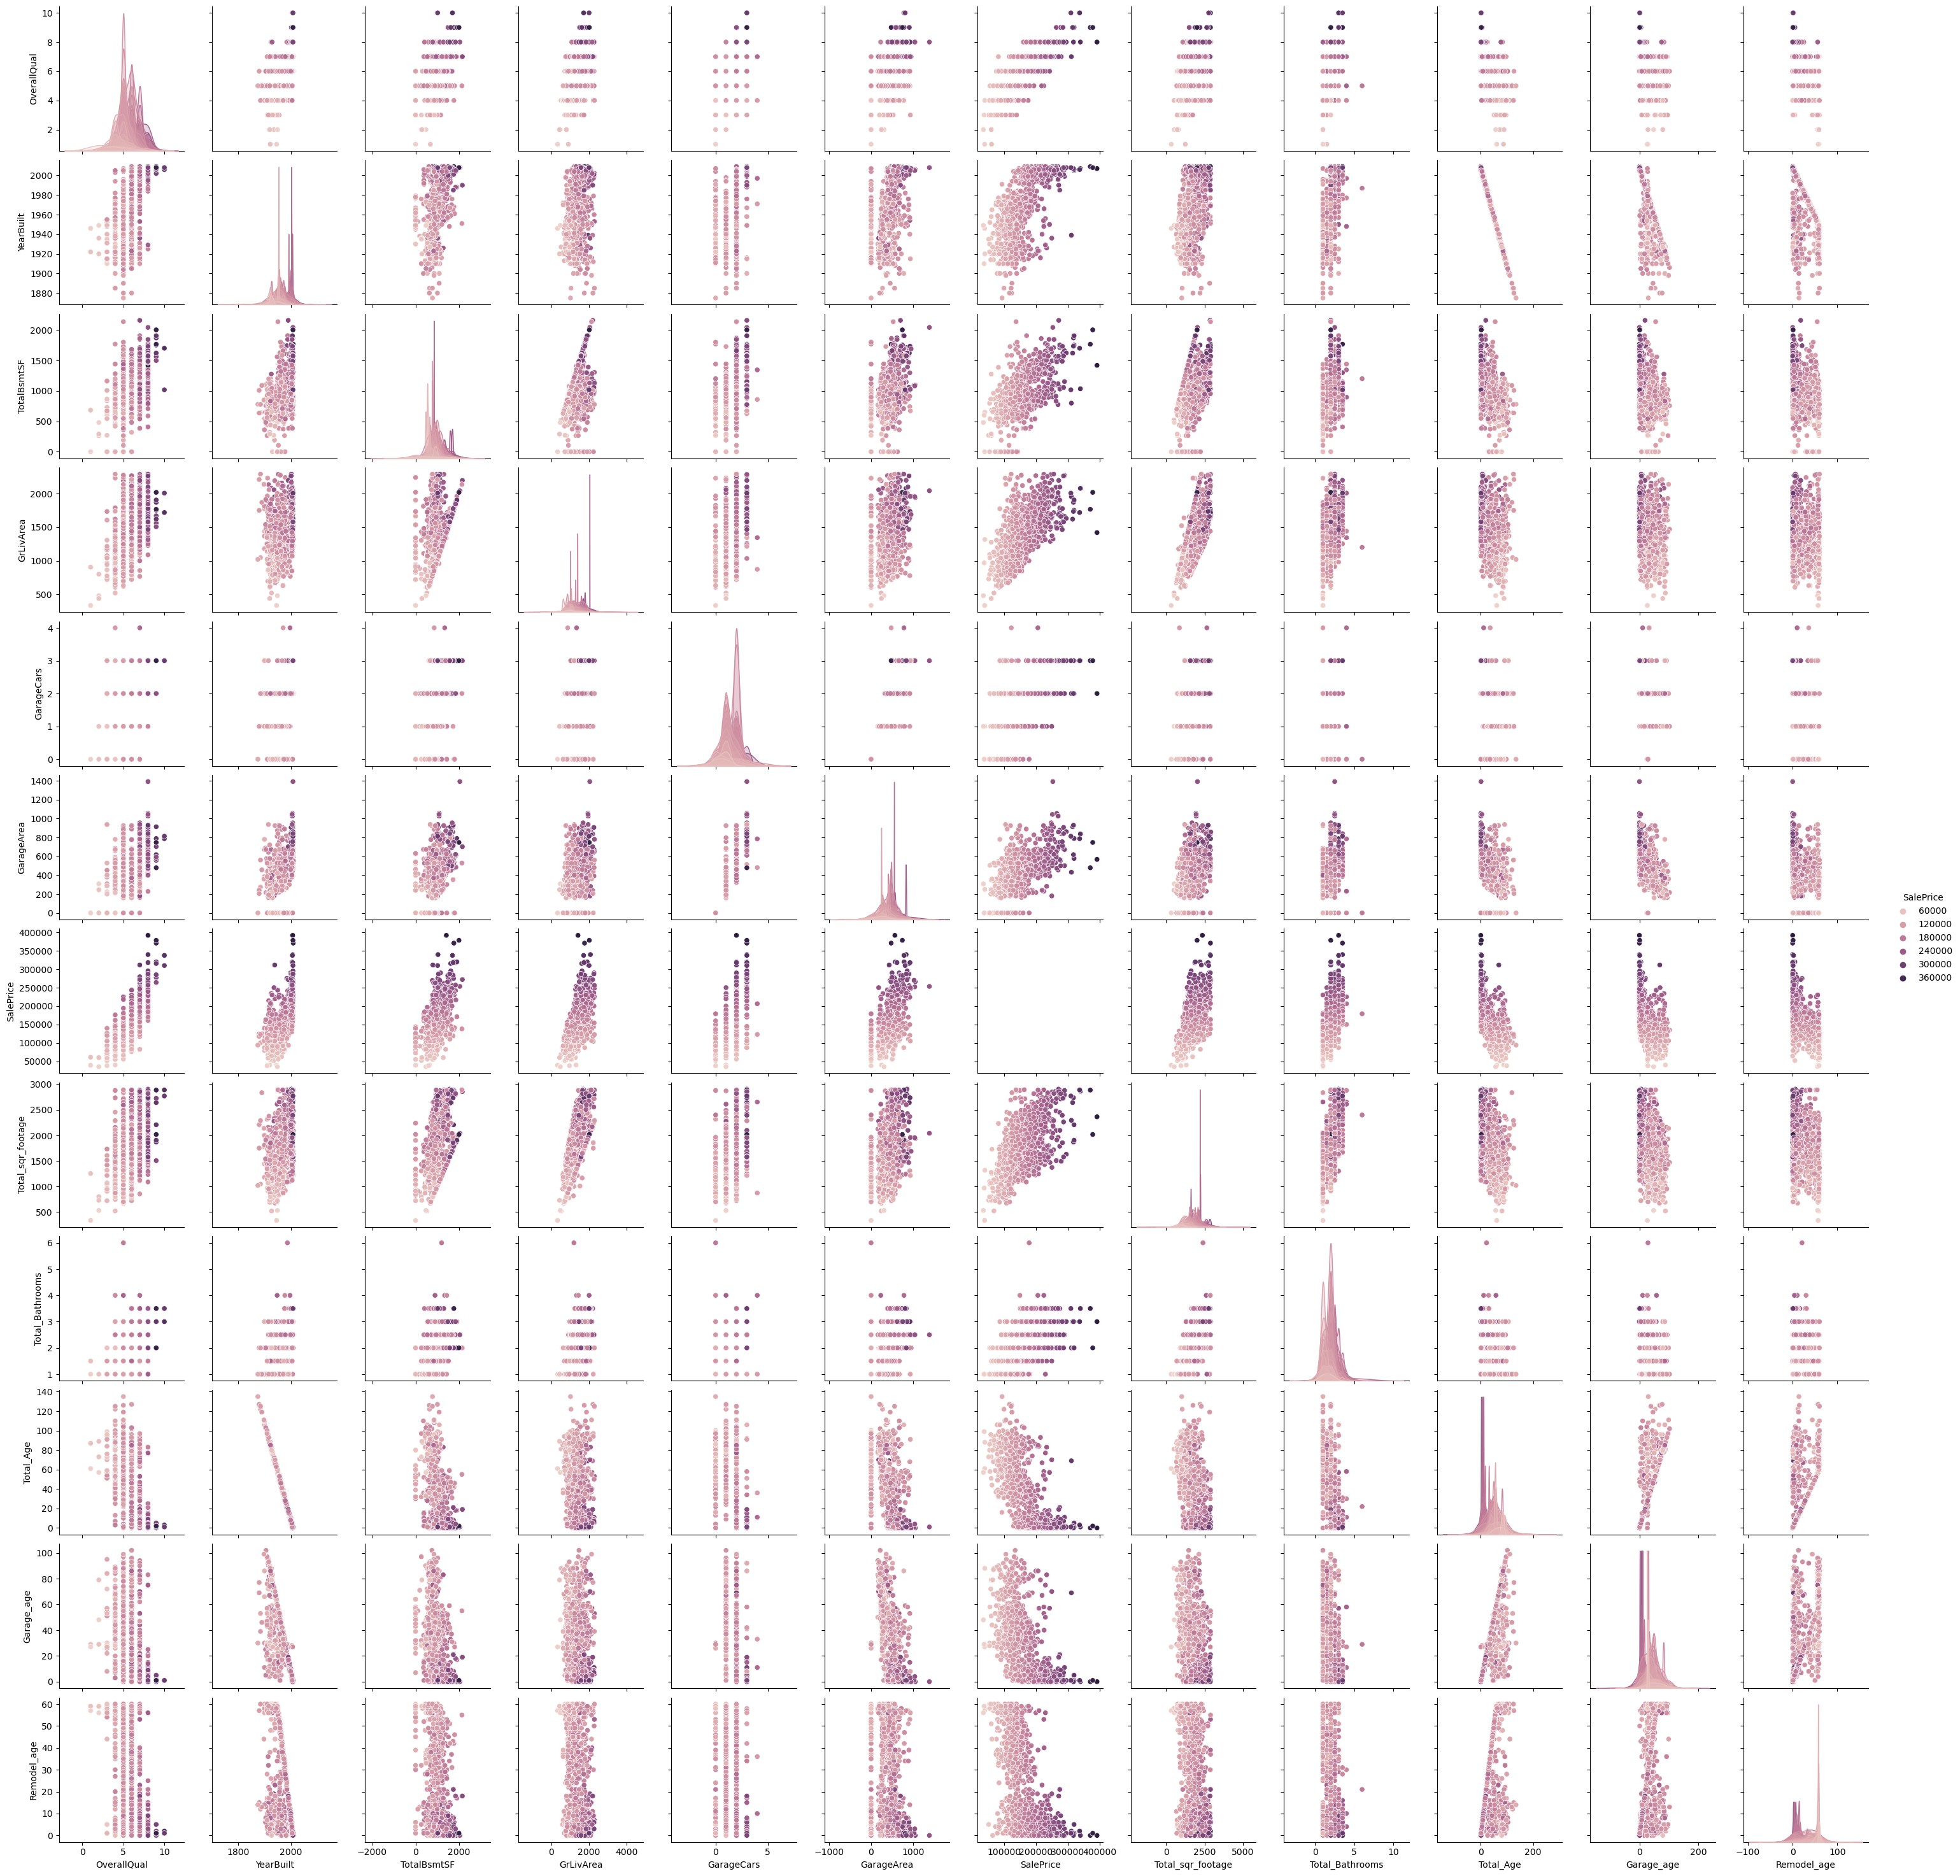

In [255]:
plt.figure(figsize = (70, 90))
sns.pairplot(df_house, vars= important_num_cols, hue='SalePrice')
plt.show()

##### Updates: 
1. When **`SalesPrice`** increses, the **`GrLivArea`** will increases too
2. When **`SalesPrice`** increses,  the **`Total_sqr_footage`** will increases too
3. There is a clear negative relationship between total **`Total_age`** and **`YearBuilt`**

### 6.4 Conduct Multivariate Analysis for all variables/columns using Heat Map

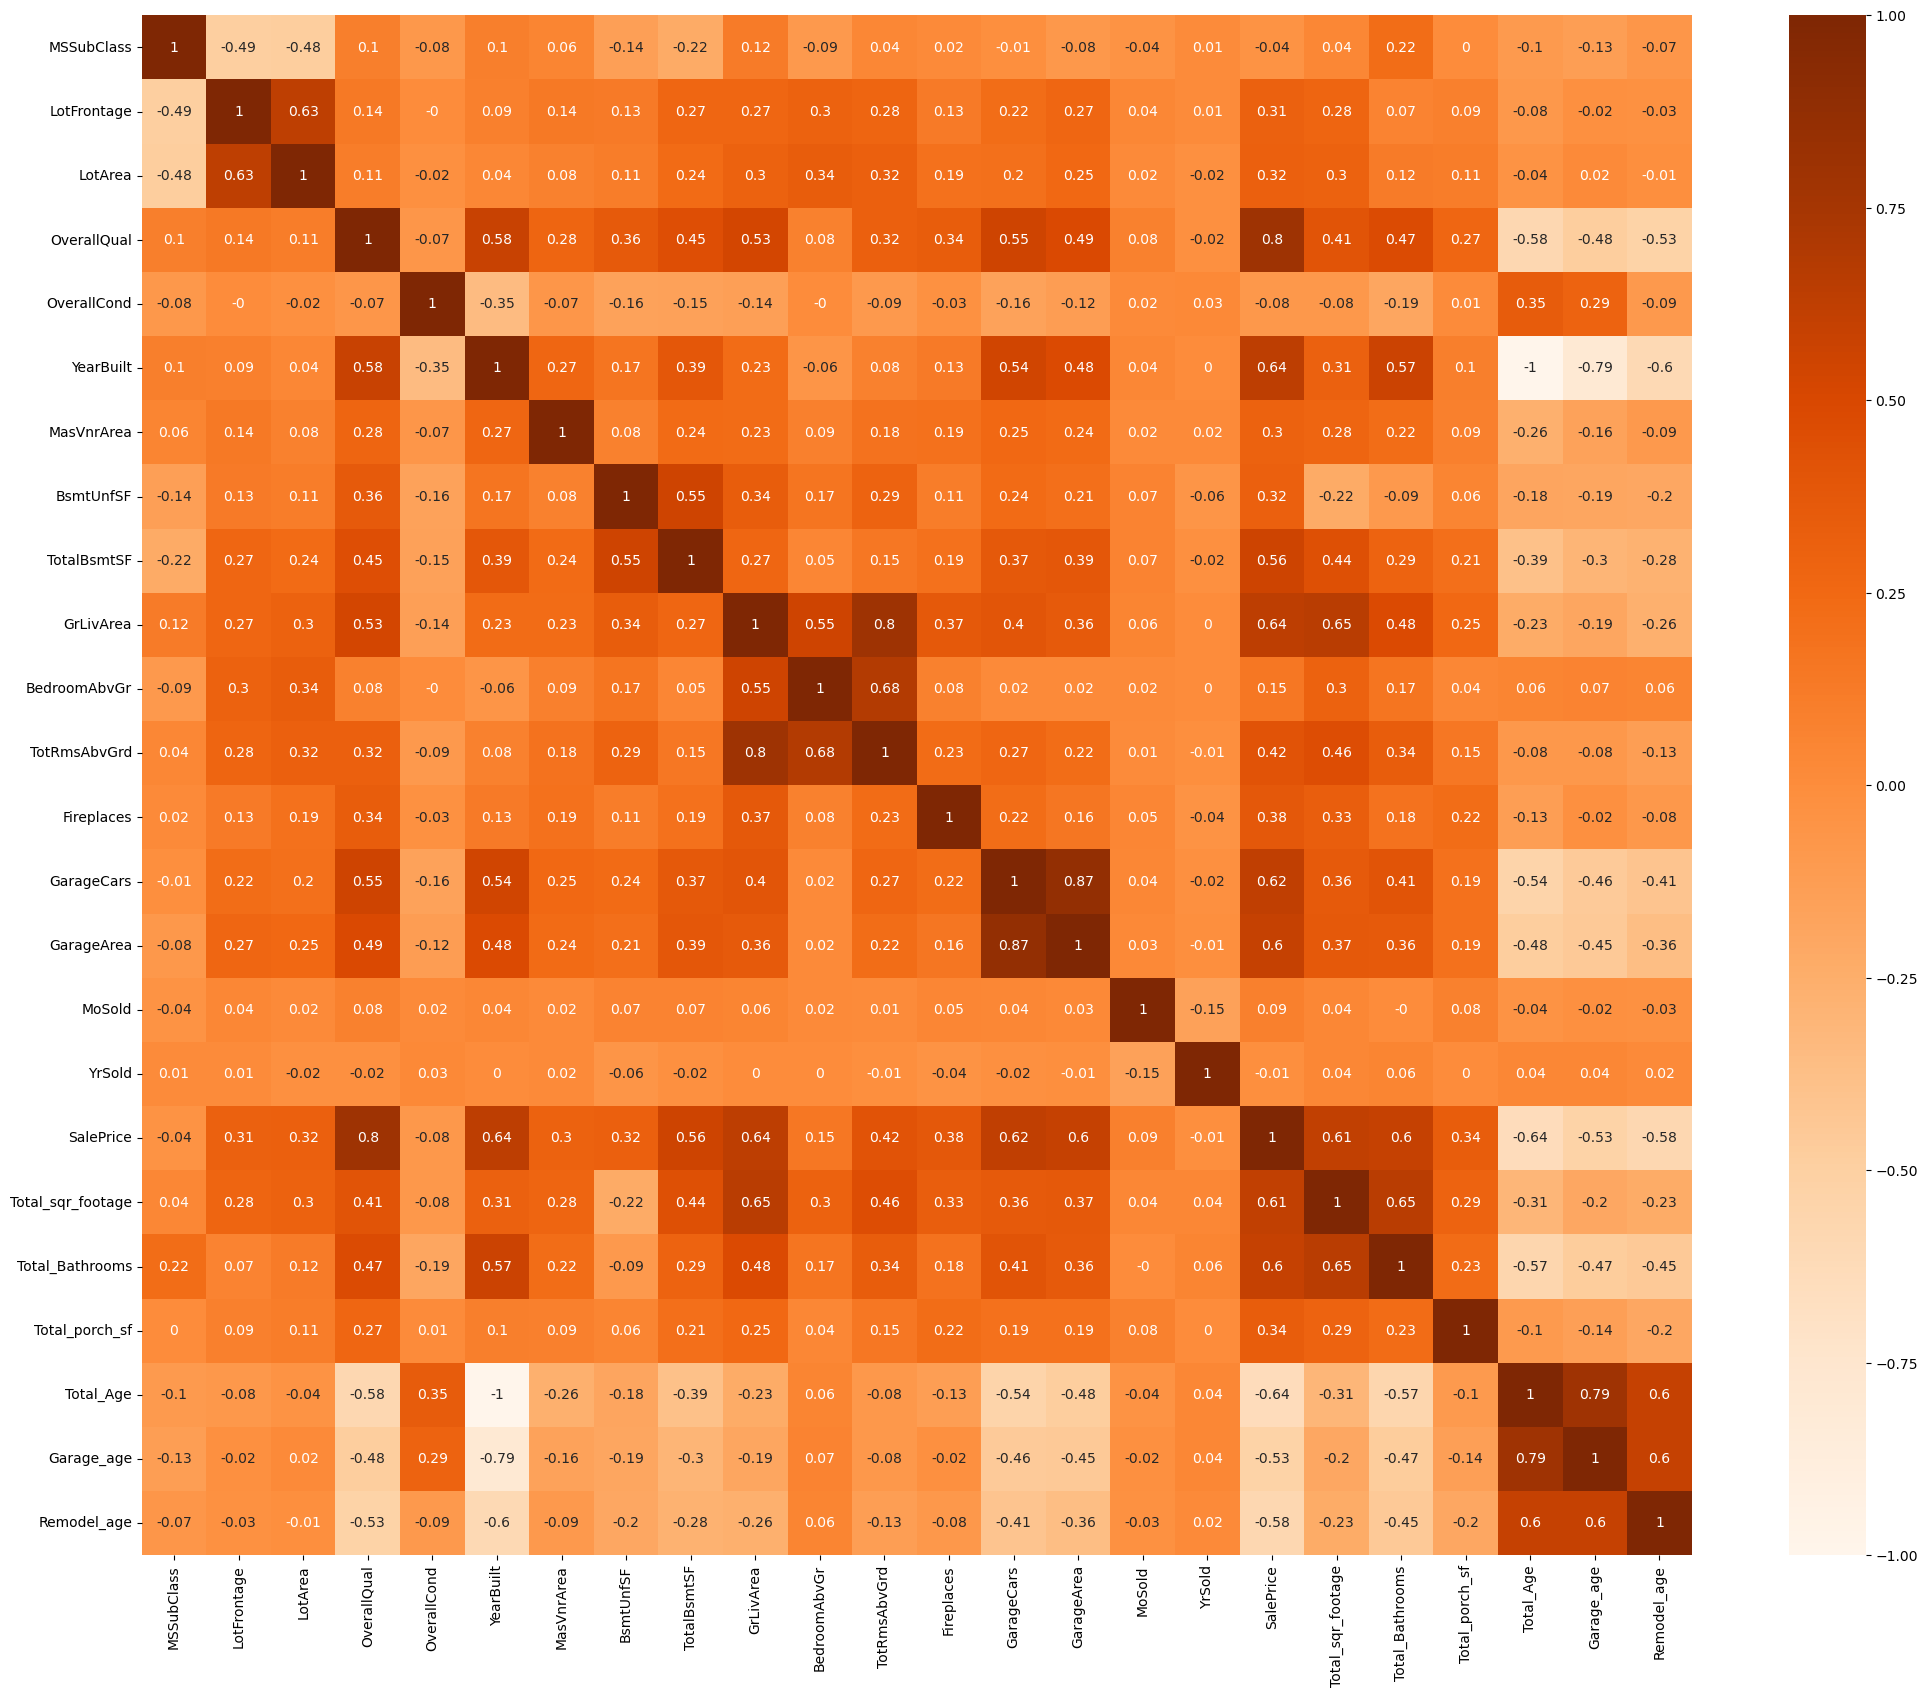

In [256]:
# Check the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap for all numerical features
sns.heatmap(round(df_house.corr(),2), cmap='Oranges' , annot=True, center = 0)
plt.show()

##### Updates:
1. **`SalePrice`** and **`TotalAge`** also have a negative correlation with r= -0.62
2. **`GarageArea`** and **`GarageCars`** have a strong positive correlation with r=0.88 since both are about the garage sizes.
3. **`TotRmsAbvGrd`** and **`GrLivArea`** have a strong positive correlation with r=0.81

Some pairs with high correlation will be dropped during model preparation with values of p-value and VIF

In [257]:
#Identify a list of variables with high correlations with SalesPrice
df_house.corr()['SalePrice'].round(decimals = 2).sort_values(ascending=False)

SalePrice            1.00
OverallQual          0.80
GrLivArea            0.64
YearBuilt            0.64
GarageCars           0.62
Total_sqr_footage    0.61
Total_Bathrooms      0.60
GarageArea           0.60
TotalBsmtSF          0.56
TotRmsAbvGrd         0.42
Fireplaces           0.38
Total_porch_sf       0.34
BsmtUnfSF            0.32
LotArea              0.32
LotFrontage          0.31
MasVnrArea           0.30
BedroomAbvGr         0.15
MoSold               0.09
YrSold              -0.01
MSSubClass          -0.04
OverallCond         -0.08
Garage_age          -0.53
Remodel_age         -0.58
Total_Age           -0.64
Name: SalePrice, dtype: float64

##### Updates: The **`SalesPrice`** is highly corelated with variables like **`OverallQual`**, **`GrLivArea`**, **`Total_sqr_footage`** and **`GarageCars`**

# Step 7. Conduct Data Preparation for Modelling

Data preparation follows three steps:
1. Encode Catagorical Columns with encoding or creating Dummy Variables
3. Divide the data into Train and Test sets
2. Conduct scaling on Continous variables on Train set

## 7.1 Create Dummy Variables for Categorical Columns

In [258]:
#Change the datatype of categorical columns from object to category
Cat_cols = []
for i in df_house.columns :
    if df_house[i].dtype == "object":
        df_house[i]=df_house[i].astype('category')
        Cat_cols.append(i)
print("Below are the list of",len(Cat_cols) ,"Categorical Columns are :\n")
print(Cat_cols)
df_house.info()#displaying the Datatypes

Below are the list of 27 Categorical Columns are :

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 0 to 1455
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MSSubClass         1067 non-null   int64   
 1   MSZoning           1067 non-null   category
 2   LotFrontage        1067 non-null   float64 
 3   LotArea            1067 non-null   int64   
 4   LotShape           1067 non-null   category
 5   LandContour        1067 non-null   category
 6   LotConfig          1067 non-null   category
 7   Neighborhood    

- Dummy Variables were created using **`get_dummies`** function
- The coding **`drop_first`** as True was used to drop the 1st dummy variable of each categorical column to increases the efficiency of the model
- The orginal dataset was used so that the orginal categorical column was removed again to increases the efficiency of the model

In [259]:
df_house = pd.get_dummies(df_house,drop_first=True)
df_house.info()#displaying the updated Datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 0 to 1455
Columns: 185 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(20), uint8(161)
memory usage: 376.2 KB


In [260]:
#Lets check the updated Dataset
df_house.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   MasVnrArea  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  SaleType_ConLI  \
0       196.0        150          856       1710  ...               0   
1         0.0        284         1262       1262  ...               0   
2       162.0        434          920       1786  ...               0   
3         0.0        540          756       1717  ...               0   
4       350.0        490         1145       2198  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 185 columns]

In [261]:
#Check the updated Dataset on percentile
df_house.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1067.000000  1067.000000   1067.000000  1067.000000  1067.000000   
mean     58.144330    64.951265   8589.007498     5.828491     5.602624   
std      43.800736    15.470103   2883.539044     1.235655     1.111729   
min      20.000000    21.000000   1300.000000     1.000000     1.000000   
25%      20.000000    60.000000   7088.000000     5.000000     5.000000   
50%      50.000000    69.000000   8780.000000     6.000000     5.000000   
75%      75.000000    74.000000  10401.000000     7.000000     6.000000   
max     190.000000   103.000000  16285.000000    10.000000     9.000000   

         YearBuilt   MasVnrArea    BsmtUnfSF  TotalBsmtSF    GrLivArea  ...  \
count  1067.000000  1067.000000  1067.000000  1067.000000  1067.000000  ...   
mean   1969.184630    61.111528   566.072165   959.262418  1354.308341  ...   
std      29.982087   102.441159   423.482484   348.948934   368.428483  ...   
min    1875.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%    1950.000000     0.000000   244.000000   768.000000  1062.500000  ...   
50%    1970.000000     0.000000   495.000000   925.000000  1338.000000  ...   
75%    2000.000000   104.000000   808.000000  1151.000000  1628.000000  ...   
max    2009.000000   425.000000  2042.000000  2158.000000  2290.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1067.000000     1067.000000   1067.000000   1067.000000   
mean         0.002812        0.004686      0.068416      0.002812   
std          0.052975        0.068326      0.252577      0.052975   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1067.000000            1067.000000           1067.000000   
mean      0.880975               0.003749              0.007498   
std       0.323970               0.061141              0.086304   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1067.000000           1067.000000            1067.000000  
mean               0.014995              0.834114               0.070291  
std                0.121591              0.372152               0.255756  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 185 columns]

In [262]:
#Check the updated number of rows and columns
df_house.shape

(1067, 185)

In [263]:
df_house = df_house.round(decimals = 2)

##### Updates : There are 1290 Rows & 189 Columns in the Dataset.

## 7.2 Divide the Data into Train and Test sets

### In order to perform all actions about modeling, the `sklearn` and `stats model` libraries will be needed

In [264]:
import sklearn
from sklearn.model_selection import train_test_split #To split the data into train and test sets
from sklearn.preprocessing import MinMaxScaler #To perform minmax scaling on training data from continous variables 
from sklearn.feature_selection import RFE #To perform automated Feature Selection
from sklearn.linear_model import LinearRegression #To build linear model
from sklearn.linear_model import Ridge #To conduct ridge regularization
from sklearn.linear_model import Lasso #To conduct lasso regularization
from sklearn.model_selection import GridSearchCV #To find the optimal parameter values
from sklearn.metrics import r2_score #To calculate the r-square values
import statsmodels.api as sm #To add the constant values
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor #To calculate the VIF
from sklearn.metrics import mean_squared_error #To calculate the mean squared error

In [265]:
# We will split the data with train set at 70% and test set at 30%
# The random_state is fixed at a value of 100 so that the randon seed is set
df_train,df_test = train_test_split(df_house, train_size = 0.7, random_state = 100)
print ("The Size of Train data is",df_train.shape)
print ("The Size of Test data is",df_test.shape)

The Size of Train data is (746, 185)
The Size of Test data is (321, 185)


##### Note : From now on, the `Train Data` ( df_train ) will be used first to build the model and at the end we will use `Test data` ( df_test) to evaluate our model

## 7.3 Perform Scaling on Features

- Scaling will bring all variables to same scale, also scaling helps on the model optimisation
- Scaling has 2 types: min-max (normalization) and standardization
- In this project, **Min-max Scaling on Continous Columns** will be performed
- The min-max scaling method can also **handle the outliers** on variables, because it keeps all values between 0 and 1
- The `fit_transform` will be used on the training data.
- The `fit_transform` is used on the training data so that we can **scale the training data** as well as **learn the scaling parameters.**

In [266]:
#Extract the numerical columns from the df_train
Num_cols = []
for i in df_train.columns :
    if df_train[i].dtype != "uint8":
        Num_cols.append(i)
print("Below are the list of",len(Num_cols) ,"Numerical Columns are :\n")
print(Num_cols)

Below are the list of 24 Numerical Columns are :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


In [267]:
Scaler = MinMaxScaler() # Instantiate an object
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df_train[Num_cols] = Scaler.fit_transform(df_train[Num_cols])

In [268]:
#Inspect the data in percentile after min-max Scaling
df_train[Num_cols].describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  746.000000   746.000000  746.000000   746.000000   746.000000   
mean     0.219957     0.538645    0.489352     0.533512     0.579926   
std      0.257748     0.189106    0.192207     0.136638     0.141006   
min      0.000000     0.000000    0.000000     0.000000     0.000000   
25%      0.000000     0.475610    0.386053     0.444444     0.500000   
50%      0.176471     0.585366    0.500200     0.555556     0.500000   
75%      0.352941     0.658537    0.611295     0.666667     0.625000   
max      1.000000     1.000000    1.000000     1.000000     1.000000   

        YearBuilt  MasVnrArea   BsmtUnfSF  TotalBsmtSF   GrLivArea  ...  \
count  746.000000  746.000000  746.000000   746.000000  746.000000  ...   
mean     0.692489    0.147081    0.275066     0.449252    0.520390  ...   
std      0.224497    0.239869    0.206216     0.158146    0.191439  ...   
min      0.000000    0.000000    0.000000     0.000000    0.000000  ...   
25%      0.560078    0.000000    0.119613     0.359013    0.368354  ...   
50%      0.689922    0.000000    0.239961     0.436052    0.505624  ...   
75%      0.922481    0.249412    0.394711     0.534175    0.662832  ...   
max      1.000000    1.000000    1.000000     1.000000    1.000000  ...   

       GarageArea      MoSold      YrSold   SalePrice  Total_sqr_footage  \
count  746.000000  746.000000  746.000000  746.000000         746.000000   
mean     0.311612    0.489520    0.462466    0.342698           0.551774   
std      0.140324    0.241480    0.329631    0.142732           0.190279   
min      0.000000    0.000000    0.000000    0.000000           0.000000   
25%      0.213669    0.363636    0.250000    0.252851           0.426448   
50%      0.316906    0.454545    0.500000    0.315090           0.543335   
75%      0.391187    0.636364    0.750000    0.419663           0.671201   
max      1.000000    1.000000    1.000000    1.000000           1.000000   

       Total_Bathrooms  Total_porch_sf   Total_Age  Garage_age  Remodel_age  
count       746.000000      746.000000  746.000000  746.000000   746.000000  
mean          0.208847        0.349880    0.303297    0.308193     0.412846  
std           0.142092        0.281731    0.227873    0.234827     0.350676  
min           0.000000        0.000000    0.000000    0.000000     0.000000  
25%           0.100000        0.085476    0.070866    0.078431     0.083333  
50%           0.200000        0.347044    0.307087    0.294118     0.283333  
75%           0.300000        0.565553    0.440945    0.470588     0.750000  
max           1.000000        1.000000    1.000000    1.000000     1.000000  

[8 rows x 24 columns]

##### Updates:  All  continous variables are successfully scaled where the max values are all "1" and min values are all "0"

# Step 8. Train the Model

- In order to train a model we need to perform **Feature Selection** which are basically done by 3 ways :
    1. Manual Selection in which each one is selected 1 by 1.
    2. Manual Elimination in which each one is eliminated 1 by 1.
    3. Automated Process (RFE)


- RFE or **Recursive Feature Elimination** is an automated approach for feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.


- The automation (RFE) process will be used

In [269]:
#Define X_train and y_train
y_train = df_train.pop('SalePrice') #This contains only the Target Variable
X_train = df_train #This contains all Independent Variables except the Target Variable
#Since 'SalePrice' is the target variable we will keep it only on y-train and remove it from X_train

In [270]:
#Inspect the X_train data set
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 154 to 1087
Columns: 184 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(23), uint8(161)
memory usage: 257.2 KB


In [271]:
#Inspect the y_train data set
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 746 entries, 154 to 1087
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
746 non-null    float64
dtypes: float64(1)
memory usage: 11.7 KB


### Model 1 - Automated Process using RFE

In [272]:
#Fit the Model
lr = LinearRegression()
#Since we have 186 columns in the X_train, let's select only half of it , say 94 using RFE
rfe = RFE(lr, n_features_to_select=94)
rfe = rfe.fit(X_train,y_train)
#View the support_ and rank_ 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 60),
 ('LotFrontage', False, 47),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', False, 26),
 ('BsmtUnfSF', False, 13),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 24),
 ('Fireplaces', False, 73),
 ('GarageCars', True, 1),
 ('GarageArea', False, 15),
 ('MoSold', False, 61),
 ('YrSold', True, 1),
 ('Total_sqr_footage', True, 1),
 ('Total_Bathrooms', True, 1),
 ('Total_porch_sf', True, 1),
 ('Total_Age', True, 1),
 ('Garage_age', True, 1),
 ('Remodel_age', False, 18),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 80),
 ('LotShape_IR3', False, 68),
 ('LotShape_Reg', False, 69),
 ('LandContour_HLS', False, 5),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', True, 1),
 ('LotConfig_CulDSac', False, 75),
 ('LotConfig_FR2', False, 7),
 ('LotConfig_FR3'

##### Updates :  
- The **True, 1** means that the feature is selected by RFE 
- Otherwise, the rest with "0" are not selected by RFE

In [273]:
#List of columns selected by RFE
Rfe_Cols = X_train.columns[rfe.support_]
Rfe_Cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF',
       'GrLivArea', 'BedroomAbvGr', 'GarageCars', 'YrSold',
       'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age',
       'Garage_age', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_Low', 'LandContour_Lvl',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAe',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBloc

In [274]:
#List of columns NOT selected by RFE
Rfe_not_Cols = X_train.columns[~rfe.support_]
Rfe_not_Cols

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtUnfSF', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'MoSold', 'Remodel_age', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill',
       'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_Somerst',
       'Condition1_Feedr', 'Condition1_PosA', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_2fmCon',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd

In [275]:
#Create X_train using RFE for the selected variables
#We are using the function of statsmodels here
X_train_rfe = X_train[Rfe_Cols] #X_train_rfe will now have all the RFE selected features
X_train_rfe = sm.add_constant(X_train_rfe) # adding the constant c to the variables to make the equation: y = mx + c
X_train_rfe.shape

(746, 95)

In [276]:
#Runn the Model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [277]:
#Stats summary of the model 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     100.3
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.28e-322
Time:                        15:39:29   Log-Likelihood:                 1367.2
No. Observations:                 746   AIC:                            -2566.
Df Residuals:                     662   BIC:                            -2179.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [278]:
#Listing VIF of all columns
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns #Column Names
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2) #Rounding to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

Features    VIF
47     Exterior1st_CBlock    inf
54     Exterior2nd_CBlock    inf
87        GarageQual_none    inf
86          GarageQual_TA    inf
4               YearBuilt    inf
85          GarageQual_Po    inf
84          GarageQual_Gd    inf
83          GarageQual_Fa    inf
82      GarageFinish_none    inf
9                  YrSold    inf
81        GarageType_none    inf
77      BsmtFinType2_none    inf
75      BsmtFinType1_none    inf
13              Total_Age    inf
71          BsmtCond_none    inf
69          BsmtQual_none    inf
94  SaleCondition_Partial  50.04
90           SaleType_New  49.28
64           ExterQual_TA  42.80
63           ExterQual_Gd  40.21
17            MSZoning_RL  34.71
18            MSZoning_RM  26.86
51    Exterior1st_VinylSd  23.40
57    Exterior2nd_VinylSd  23.18
68            BsmtQual_TA  19.38
73      BsmtExposure_none  19.13
55    Exterior2nd_CmentBd  17.91
48    Exterior1st_CemntBd  16.96
67            BsmtQual_Gd  15.02
60        MasVnrType_None  14.97
80         KitchenQual_TA  14.59
59     MasVnrType_BrkFace  13.74
79         KitchenQual_Gd  12.81
15            MSZoning_FV  10.25
52    Exterior1st_Wd Sdng   6.74
58    Exterior2nd_Wd Sdng   6.57
61       MasVnrType_Stone   4.99
14             Garage_age   4.67
6               GrLivArea   4.64
62           ExterQual_Fa   4.50
10      Total_sqr_footage   4.01
8              GarageCars   3.78
2             OverallQual   3.76
16            MSZoning_RH   3.49
27     Neighborhood_NAmes   3.43
78         KitchenQual_Fa   3.29
66            BsmtQual_Fa   3.22
11        Total_Bathrooms   3.19
22   Neighborhood_CollgCr   2.92
1                 LotArea   2.77
5             TotalBsmtSF   2.56
93   SaleCondition_Normal   2.52
25   Neighborhood_Gilbert   2.35
30   Neighborhood_OldTown   2.33
7            BedroomAbvGr   2.33
41        BldgType_TwnhsE   2.18
40         BldgType_Twnhs   2.14
31    Neighborhood_Sawyer   2.01
24   Neighborhood_Edwards   1.91
32   Neighborhood_SawyerW   1.86
20        LandContour_Lvl   1.78
34    Neighborhood_Timber   1.74
39        BldgType_Duplex   1.72
3             OverallCond   1.70
23   Neighborhood_Crawfor   1.70
28    Neighborhood_NWAmes   1.63
19        LandContour_Low   1.58
26   Neighborhood_Mitchel   1.56
33   Neighborhood_StoneBr   1.53
53    Exterior2nd_Brk Cmn   1.53
70            BsmtCond_Po   1.41
72        BsmtExposure_Gd   1.38
45    Exterior1st_BrkComm   1.37
92   SaleCondition_Family   1.36
36        Condition1_Norm   1.35
46    Exterior1st_BrkFace   1.35
56      Exterior2nd_Stone   1.32
12         Total_porch_sf   1.31
50     Exterior1st_Stucco   1.30
35   Neighborhood_Veenker   1.28
43      HouseStyle_2.5Unf   1.24
76       BsmtFinType2_GLQ   1.22
74       BsmtFinType1_LwQ   1.22
42      HouseStyle_2.5Fin   1.21
91  SaleCondition_AdjLand   1.21
21   Neighborhood_ClearCr   1.17
38        Condition1_RRAe   1.15
37        Condition1_PosN   1.14
89         SaleType_ConLD   1.12
29   Neighborhood_NoRidge   1.11
88           SaleType_CWD   1.08
0                   const   0.00
44    Exterior1st_AsphShn    NaN
49      Exterior1st_Stone    NaN
65           ExterCond_Po    NaN

# Step 9. Conduct Model Prediction and Evaluation

## 9.1 Create X_test and y_test

In [279]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 1158 to 1391
Columns: 185 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(20), uint8(161)
memory usage: 113.2 KB


In [280]:
#Extract the numerical columns from the df_train
Num_cols = []
for i in df_test.columns :
    if df_test[i].dtype != "uint8":
        Num_cols.append(i)
print("Below are the list of",len(Num_cols) ,"Numerical Columns are :\n")
print(Num_cols)

Below are the list of 24 Numerical Columns are :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


In [281]:
Scaler = MinMaxScaler() # Instantiate an object
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df_test[Num_cols] = Scaler.fit_transform(df_test[Num_cols])

In [282]:
#Define X_test and y_test
y_test = df_test.pop('SalePrice') #This contains only the Target Variable
X_test = df_test #This contains all the Independent Variables except the Target Variable
#Since 'SalePrice' is the target variable we will keep it only on y-test and remove it from X_train

## 9.2 Perform Ridge - Regularization

In [283]:
# Considering following alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [284]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
13         2.0         -0.026537        -0.033490                1
12         1.0         -0.025655        -0.033579                2
14         3.0         -0.027283        -0.033594                3
11         0.9         -0.025553        -0.033645                4
10         0.8         -0.025447        -0.033737                5
15         4.0         -0.027938        -0.033807                6
9          0.7         -0.025338        -0.033851                7
8          0.6         -0.025229        -0.033986                8
16         5.0         -0.028528        -0.034104                9
7          0.5         -0.025121        -0.034159               10
6          0.4         -0.025013        -0.034367               11
17         6.0         -0.029072        -0.034432               12
5          0.3         -0.024894        -0.034637               13
18         7.0         -0.029581        -0.034756               14
4          0.2         -0.024766        -0.034994               15
19         8.0         -0.030055        -0.035069               16
20         9.0         -0.030497        -0.035391               17
3          0.1         -0.024621        -0.035582               18
21        10.0         -0.030918        -0.035705               19
2         0.01         -0.024492        -0.036552               20
1        0.001         -0.024498        -0.036722               21
0       0.0001         -0.024499        -0.036743               22
22          20         -0.034227        -0.038370               23
23          50         -0.040186        -0.043312               24
24         100         -0.045814        -0.048200               25
25         500         -0.061759        -0.062821               26

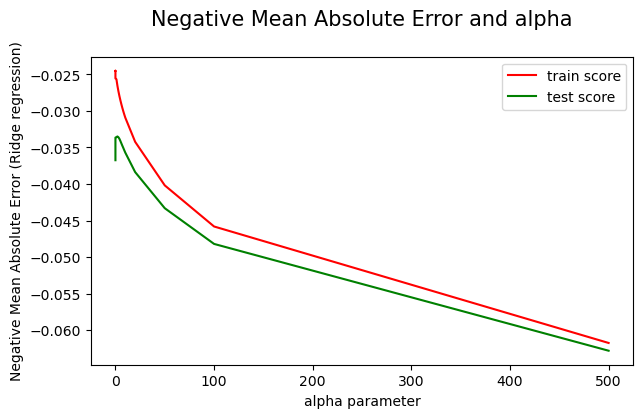

In [285]:
# plot Negative Mean Absolute Error vs alpha for train and test

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(7,4))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'], color='red')
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'], color='green')
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Ridge regression)')
plt.title("Negative Mean Absolute Error and alpha\n",fontsize=15)
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [286]:
ridge_model_cv.best_params_

{'alpha': 2.0}

In [287]:
# Hyperparameter lambda = 2.0
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-2.58569198e-02,  1.87899463e-02,  7.02778716e-02,  1.40147046e-01,
        9.51647985e-02,  5.27762674e-02,  8.88806174e-03,  2.82271931e-02,
        4.95961025e-02,  1.08566110e-01, -2.75461645e-02,  3.87540212e-02,
        4.13415336e-02,  2.60944461e-02,  3.72431079e-02, -3.35339321e-04,
        7.74789534e-04,  1.10017935e-01,  2.96845368e-02,  2.74257553e-02,
       -5.35829869e-02, -7.83631941e-03, -2.49121959e-02,  2.63539026e-02,
        2.78675901e-02,  3.33543196e-02,  2.20429847e-02,  2.42578442e-03,
       -4.19851001e-03,  7.81586612e-04,  5.81546507e-03, -2.12145493e-02,
       -1.36193851e-02,  6.30227568e-03, -1.42466982e-02, -3.51108120e-03,
       -2.34353184e-03, -1.04659572e-03,  1.15336509e-02,  8.90520703e-03,
       -9.52994632e-03, -1.71122873e-02,  4.14498539e-02, -3.24493787e-02,
       -2.35469026e-02, -1.61166123e-02, -1.59000408e-02, -2.25183764e-02,
       -2.59791470e-02,  1.93534747e-02, -1.87052912e-02,  2.50642454e-02,
        1.28894288e-02, -

In [288]:
#Calculate the mean squared error value
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.0034294190176216016


In [289]:
# predict the R2 value of train data
y_train_pred = ridge.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

The r2 value of train data is  0.9287294602347816


In [290]:
#predict the R2 value of test data
y_test_pred = ridge.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The r2 value of test data is  0.8790551378853632


In [291]:
# Let's try different parameters by adding +1 and subtract 1 from the recommended alpha value
alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 1: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()

alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 2: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()

alpha = 3.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 3: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 1: 
The mean squared error value is  0.0032499578079084766
The r2 value of train data is  0.9287294602347816
The r2 value of test data is  0.8790551378853632

The output when alpha is 2: 
The mean squared error value is  0.0034294190176216016
The r2 value of train data is  0.9287294602347816
The r2 value of test data is  0.8790551378853632

The output when alpha is 3: 
The mean squared error value is  0.0036005862887314357
The r2 value of train data is  0.9287294602347816
The r2 value of test data is  0.8790551378853632


#### According to the results, when either the alpha value increases or decreases the R2 stayed the same.Thus, alpha = 2 looks  fine. 

In [292]:
# house_pricing_ridge: Features and coefficienst of Ridge

house_pricing_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
house_pricing_ridge.reset_index(drop=True, inplace=True)
house_pricing_ridge

Features  Coefficient
0               MSSubClass      -0.0263
1              LotFrontage       0.0208
2                  LotArea       0.0646
3              OverallQual       0.1285
4              OverallCond       0.0860
5                YearBuilt       0.0472
6               MasVnrArea       0.0097
7                BsmtUnfSF       0.0277
8              TotalBsmtSF       0.0522
9                GrLivArea       0.1025
10            BedroomAbvGr      -0.0201
11            TotRmsAbvGrd       0.0381
12              Fireplaces       0.0437
13              GarageCars       0.0273
14              GarageArea       0.0376
15                  MoSold       0.0007
16                  YrSold       0.0009
17       Total_sqr_footage       0.1048
18         Total_Bathrooms       0.0294
19          Total_porch_sf       0.0280
20               Total_Age      -0.0479
21              Garage_age      -0.0074
22             Remodel_age      -0.0272
23             MSZoning_FV       0.0204
24             MSZoning_RH       0.0210
25             MSZoning_RL       0.0282
26             MSZoning_RM       0.0154
27            LotShape_IR2       0.0029
28            LotShape_IR3      -0.0044
29            LotShape_Reg       0.0003
30         LandContour_HLS       0.0082
31         LandContour_Low      -0.0183
32         LandContour_Lvl      -0.0125
33       LotConfig_CulDSac       0.0077
34           LotConfig_FR2      -0.0129
35           LotConfig_FR3      -0.0028
36        LotConfig_Inside      -0.0020
37    Neighborhood_Blueste      -0.0000
38     Neighborhood_BrDale       0.0107
39    Neighborhood_BrkSide       0.0093
40    Neighborhood_ClearCr      -0.0068
41    Neighborhood_CollgCr      -0.0159
42    Neighborhood_Crawfor       0.0402
43    Neighborhood_Edwards      -0.0311
44    Neighborhood_Gilbert      -0.0220
45     Neighborhood_IDOTRR      -0.0163
46    Neighborhood_MeadowV      -0.0177
47    Neighborhood_Mitchel      -0.0206
48      Neighborhood_NAmes      -0.0242
49    Neighborhood_NPkVill       0.0167
50     Neighborhood_NWAmes      -0.0140
51    Neighborhood_NoRidge       0.0213
52    Neighborhood_NridgHt       0.0138
53    Neighborhood_OldTown      -0.0225
54      Neighborhood_SWISU       0.0029
55     Neighborhood_Sawyer      -0.0262
56    Neighborhood_SawyerW      -0.0091
57    Neighborhood_Somerst       0.0331
58    Neighborhood_StoneBr       0.0773
59     Neighborhood_Timber      -0.0090
60    Neighborhood_Veenker      -0.0083
61        Condition1_Feedr       0.0079
62         Condition1_Norm       0.0269
63         Condition1_PosA       0.0020
64         Condition1_PosN       0.0273
65         Condition1_RRAe      -0.0327
66         Condition1_RRAn       0.0081
67         Condition1_RRNe       0.0014
68         Condition1_RRNn       0.0020
69         BldgType_2fmCon      -0.0037
70         BldgType_Duplex      -0.0193
71          BldgType_Twnhs      -0.0177
72         BldgType_TwnhsE      -0.0184
73       HouseStyle_1.5Unf       0.0010
74       HouseStyle_1Story      -0.0080
75       HouseStyle_2.5Fin      -0.0147
76       HouseStyle_2.5Unf      -0.0182
77       HouseStyle_2Story      -0.0039
78       HouseStyle_SFoyer      -0.0108
79         HouseStyle_SLvl      -0.0096
80         RoofStyle_Gable       0.0014
81       RoofStyle_Gambrel       0.0037
82           RoofStyle_Hip       0.0022
83       RoofStyle_Mansard       0.0041
84     Exterior1st_AsphShn       0.0000
85     Exterior1st_BrkComm      -0.0199
86     Exterior1st_BrkFace       0.0275
87      Exterior1st_CBlock      -0.0037
88     Exterior1st_CemntBd      -0.0175
89     Exterior1st_HdBoard      -0.0022
90     Exterior1st_MetalSd       0.0036
91     Exterior1st_Plywood       0.0064
92       Exterior1st_Stone       0.0000
93      Exterior1st_Stucco       0.0301
94     Exterior1st_VinylSd      -0.0061
95     Exterior1st_Wd Sdng      -0.0104
96     Exterior1st_WdShing       0.0187
97     Exterior2nd_AsphShn       0.0024
98     Exterior2nd_Brk Cmn      -0.0053
99     Exterior2nd

In [293]:
# dictionary of Features and Coefficients

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0263,
 'LotFrontage': 0.0208,
 'LotArea': 0.0646,
 'OverallQual': 0.1285,
 'OverallCond': 0.086,
 'YearBuilt': 0.0472,
 'MasVnrArea': 0.0097,
 'BsmtUnfSF': 0.0277,
 'TotalBsmtSF': 0.0522,
 'GrLivArea': 0.1025,
 'BedroomAbvGr': -0.0201,
 'TotRmsAbvGrd': 0.0381,
 'Fireplaces': 0.0437,
 'GarageCars': 0.0273,
 'GarageArea': 0.0376,
 'MoSold': 0.0007,
 'YrSold': 0.0009,
 'Total_sqr_footage': 0.1048,
 'Total_Bathrooms': 0.0294,
 'Total_porch_sf': 0.028,
 'Total_Age': -0.0479,
 'Garage_age': -0.0074,
 'Remodel_age': -0.0272,
 'MSZoning_FV': 0.0204,
 'MSZoning_RH': 0.021,
 'MSZoning_RL': 0.0282,
 'MSZoning_RM': 0.0154,
 'LotShape_IR2': 0.0029,
 'LotShape_IR3': -0.0044,
 'LotShape_Reg': 0.0003,
 'LandContour_HLS': 0.0082,
 'LandContour_Low': -0.0183,
 'LandContour_Lvl': -0.0125,
 'LotConfig_CulDSac': 0.0077,
 'LotConfig_FR2': -0.0129,
 'LotConfig_FR3': -0.0028,
 'LotConfig_Inside': -0.002,
 'Neighborhood_Blueste': -0.0,
 'Neighborhood_BrDale': 0.0107,
 'Neighborhood_BrkSide': 

In [294]:
# Do an RFE to minimise the features to 20
X_train_ridge = X_train[house_pricing_ridge.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_ridge, y_train)

In [295]:
# coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
0           OverallQual         True            1       0.1285
2             GrLivArea         True            1       0.1025
1             YearBuilt         True            1       0.0472
18        GarageQual_TA         True            1       0.0097
14    GarageFinish_none         True            1       0.0012
13      GarageType_none         True            1       0.0012
19      GarageQual_none         True            1       0.0012
3                YrSold         True            1       0.0009
5   Exterior1st_AsphShn         True            1       0.0000
16        GarageQual_Gd         True            1      -0.0002

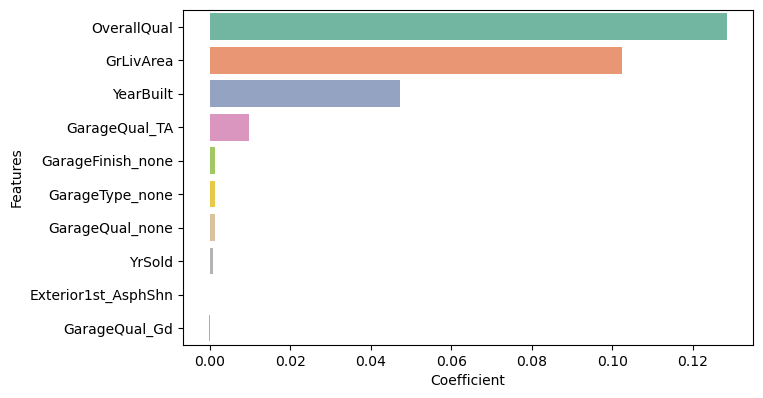

In [296]:
# bar plot for predictor variables.

plt.figure(figsize=(25,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = temp1_df)
plt.show()

## 9.3 Perform Lasso - Regularization

In [297]:
lasso = Lasso()

# Considering following alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [298]:

# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1       0.0002         -0.028369        -0.033130                1
0       0.0001         -0.026916        -0.033220                2
2       0.0003         -0.029300        -0.033500                3
3       0.0004         -0.030030        -0.034090                4
4       0.0005         -0.030755        -0.034712                5
5        0.001         -0.034495        -0.037558                6
6        0.002         -0.039117        -0.041118                7
7        0.003         -0.042903        -0.044632                8
8        0.004         -0.047365        -0.049032                9
9        0.005         -0.051852        -0.053452               10
10        0.01         -0.067299        -0.068966               11

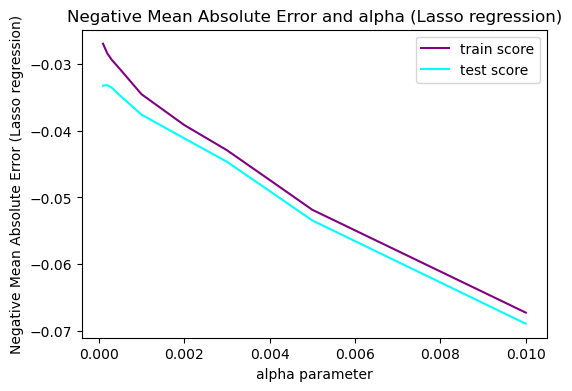

In [299]:
# plotting Negative Mean Absolute Error vs alpha for train and test

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.figure(figsize=(6,4))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'], color='purple')
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'], color='cyan')
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Lasso regression)')

plt.title("Negative Mean Absolute Error and alpha (Lasso regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [300]:
# lambda best estimator
lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [301]:
# # Hyperparameter lambda = 0.0001

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.03376164,  0.00637006,  0.06803816,  0.19829523,  0.11267137,
        0.09939175,  0.00038964,  0.        ,  0.07304718,  0.15869277,
       -0.00523677,  0.00425976,  0.03752438,  0.02270704,  0.04574652,
       -0.        ,  0.        ,  0.09032585,  0.01007959,  0.02459842,
       -0.01411458, -0.        , -0.02054896,  0.        ,  0.        ,
        0.01328012, -0.        ,  0.        , -0.        , -0.00028818,
        0.0053042 , -0.00239918, -0.00741102,  0.00482557, -0.0060959 ,
       -0.        , -0.00027848,  0.        ,  0.        ,  0.0196559 ,
       -0.        , -0.00336926,  0.04390852, -0.01441284, -0.00321472,
       -0.        , -0.        , -0.00663413, -0.01193859,  0.        ,
       -0.00183741,  0.        ,  0.00886062, -0.01324854,  0.00080494,
       -0.01147755, -0.        ,  0.04200184,  0.08357092,  0.        ,
       -0.        ,  0.        ,  0.02093431,  0.        ,  0.01324444,
       -0.01800547,  0.        ,  0.        ,  0.        ,  0.  

In [302]:
# mse
#Let's calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.002804955976533909


In [303]:
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

0.9196593064803243
The r2 value of train data is  0.9196593064803243


In [304]:
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The r2 value of test data is  0.901077992489003


In [305]:
# house_pricing_lasso: Features and coefficienst of Lasso

house_pricing_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
house_pricing_lasso = house_pricing_lasso[house_pricing_lasso['Coefficient'] != 0.00]
house_pricing_lasso.reset_index(drop=True, inplace=True)
house_pricing_lasso

Features  Coefficient
0              MSSubClass      -0.0338
1             LotFrontage       0.0064
2                 LotArea       0.0680
3             OverallQual       0.1983
4             OverallCond       0.1127
5               YearBuilt       0.0994
6              MasVnrArea       0.0004
7             TotalBsmtSF       0.0730
8               GrLivArea       0.1587
9            BedroomAbvGr      -0.0052
10           TotRmsAbvGrd       0.0043
11             Fireplaces       0.0375
12             GarageCars       0.0227
13             GarageArea       0.0457
14      Total_sqr_footage       0.0903
15        Total_Bathrooms       0.0101
16         Total_porch_sf       0.0246
17              Total_Age      -0.0141
18            Remodel_age      -0.0205
19            MSZoning_RL       0.0133
20           LotShape_Reg      -0.0003
21        LandContour_HLS       0.0053
22        LandContour_Low      -0.0024
23        LandContour_Lvl      -0.0074
24      LotConfig_CulDSac       0.0048
25          LotConfig_FR2      -0.0061
26       LotConfig_Inside      -0.0003
27   Neighborhood_BrkSide       0.0197
28   Neighborhood_CollgCr      -0.0034
29   Neighborhood_Crawfor       0.0439
30   Neighborhood_Edwards      -0.0144
31   Neighborhood_Gilbert      -0.0032
32   Neighborhood_Mitchel      -0.0066
33     Neighborhood_NAmes      -0.0119
34    Neighborhood_NWAmes      -0.0018
35   Neighborhood_NridgHt       0.0089
36   Neighborhood_OldTown      -0.0132
37     Neighborhood_SWISU       0.0008
38    Neighborhood_Sawyer      -0.0115
39   Neighborhood_Somerst       0.0420
40   Neighborhood_StoneBr       0.0836
41        Condition1_Norm       0.0209
42        Condition1_PosN       0.0132
43        Condition1_RRAe      -0.0180
44        BldgType_Duplex      -0.0085
45        BldgType_TwnhsE      -0.0036
46      HouseStyle_2.5Unf      -0.0057
47      HouseStyle_2Story      -0.0010
48        RoofStyle_Gable       0.0003
49    Exterior1st_BrkFace       0.0144
50    Exterior1st_HdBoard      -0.0072
51     Exterior1st_Stucco       0.0219
52    Exterior1st_Wd Sdng      -0.0078
53    Exterior1st_WdShing       0.0005
54    Exterior2nd_CmentBd       0.0013
55    Exterior2nd_HdBoard      -0.0012
56    Exterior2nd_Plywood      -0.0073
57    Exterior2nd_VinylSd       0.0009
58    Exterior2nd_Wd Shng      -0.0043
59       MasVnrType_Stone       0.0137
60        MasVnrType_none      -0.0024
61           ExterQual_TA      -0.0107
62           ExterCond_Fa      -0.0064
63           ExterCond_TA       0.0020
64      Foundation_CBlock      -0.0011
65       Foundation_PConc       0.0091
66            BsmtQual_Gd      -0.0232
67            BsmtQual_TA      -0.0217
68            BsmtCond_Gd       0.0024
69            BsmtCond_TA       0.0077
70        BsmtExposure_Gd       0.0289
71        BsmtExposure_No      -0.0006
72       BsmtFinType1_GLQ       0.0067
73       BsmtFinType1_LwQ      -0.0135
74       BsmtFinType1_Rec      -0.0042
75       BsmtFinType1_Unf      -0.0059
76       BsmtFinType2_Unf       0.0073
77           HeatingQC_Gd      -0.0107
78           HeatingQC_TA      -0.0092
79         KitchenQual_Fa      -0.0671
80         KitchenQual_Gd      -0.0606
81         KitchenQual_TA      -0.0636
82      GarageType_Attchd       0.0048
83     GarageType_BuiltIn       0.0052
84       GarageFinish_RFn      -0.0042
85       GarageFinish_Unf      -0.0088
86          GarageQual_TA       0.0026
87   SaleCondition_Normal       0.0192
88  SaleCondition_Partial       0.0531

In [306]:
# dictionary of Features and Coefficients

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.033761641936020374,
 'LotFrontage': 0.006370060888982288,
 'LotArea': 0.06803815735413514,
 'OverallQual': 0.19829523044803915,
 'OverallCond': 0.11267137209669482,
 'YearBuilt': 0.09939175309020919,
 'MasVnrArea': 0.00038963751945913605,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.07304717798148869,
 'GrLivArea': 0.1586927693570809,
 'BedroomAbvGr': -0.005236771055415817,
 'TotRmsAbvGrd': 0.004259761166627996,
 'Fireplaces': 0.03752438463719791,
 'GarageCars': 0.022707038412575084,
 'GarageArea': 0.045746524027884476,
 'MoSold': -0.0,
 'YrSold': 0.0,
 'Total_sqr_footage': 0.09032584933733771,
 'Total_Bathrooms': 0.010079587310206754,
 'Total_porch_sf': 0.02459842145737093,
 'Total_Age': -0.014114576480799983,
 'Garage_age': -0.0,
 'Remodel_age': -0.020548960984983853,
 'MSZoning_FV': 0.0,
 'MSZoning_RH': 0.0,
 'MSZoning_RL': 0.013280119289811798,
 'MSZoning_RM': -0.0,
 'LotShape_IR2': 0.0,
 'LotShape_IR3': -0.0,
 'LotShape_Reg': -0.0002881780598718101,
 'LandContour_HLS': 0

In [307]:
# RFE : minimize features to 20

X_train_lasso = X_train[house_pricing_lasso.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# Run RFE

rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_lasso, y_train)

In [308]:
# coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
1             OverallQual         True            1     0.198295
5               GrLivArea         True            1     0.158693
2             OverallCond         True            1     0.112671
3               YearBuilt         True            1     0.099392
9       Total_sqr_footage         True            1     0.090326
13   Neighborhood_StoneBr         True            1     0.083571
4             TotalBsmtSF         True            1     0.073047
0                 LotArea         True            1     0.068038
19  SaleCondition_Partial         True            1     0.053133
8              GarageArea         True            1     0.045747

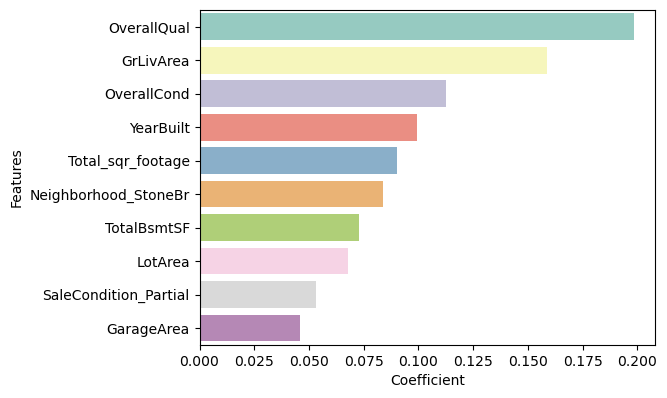

In [309]:
#  bar plot for predictor variables.

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set3', data = temp2_df)
plt.show()

In [310]:
#let's predict the R-squared value of test
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.901077992489003


# Step 10. Conclusions

Below are the optimal values of LAMBDA from Ridge and Lasso regressions:
- Ridge: `2.0`
- Lasso: `0.0001`

Below are Mean Squared error for Ridge and Lasso regressions:
- Ridge: `0.00342`
- Lasso: `0.00280`

Below are r2 values from Ridge and Lasso regressions:
- Ridge - Train = `0.929` , Test = `0.879`
- Lasso - Train = `0.920` , Test = `0.901`

- The Mean Squared Error of Lasso is much lower than the one of Ridge.
- Lasso helps in feature reduction. Also the coefficient values of the lasso are shrunk toward to 0 that helps increase model interpretation if we look at the magnitude of the coefficients. Thus, `Lasso regression does perform better than Ridge one`.

### Top 5 variables have best predictability with Lasso Regularization  :

 1. OverallQual	(Overall material and finish of the house)
 2. GrLivArea	(Living area square feet)
 3. OverallCond	(Rates the overall condition of the house)
 4. YearBuilt	(Age of the house)
 5. Total_sqr_footage (Overall square feet of the house)

As the values of these variable increase, the sale prices will increase too

## Assignment Part - II 
-- Please refer my PDF file for the complete answers/solutions for the subjective questions  

**Question 1** : What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

In [311]:
#Lets find for Ridge first
alpha = 2.0 # Optimal value of alpha is 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 2: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 4.0 # Optimal value of alpha is 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 4: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 2: 
The mean squared error value is  0.0034294190176216016
The r2 value of train data is  0.9196593064803243
The r2 value of test data is  0.901077992489003

The output when alpha is 4: 
The mean squared error value is  0.003759995811271993
The r2 value of train data is  0.9196593064803243
The r2 value of test data is  0.901077992489003


In [312]:
#Let's create a ridge model with alpha  = 4.0
ridge_doubled = Ridge(alpha = 4.0)
ridge_doubled.fit(X_train,y_train)

y_train_ridge_pred_doubled = ridge_doubled.predict(X_train)
y_test_ridge_pred_doubled = ridge_doubled.predict(X_test)
ridge_coef_doubled_df = pd.DataFrame(ridge_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 4 are :\n")
print(ridge_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 4 are :

                      Coefficient
OverallQual              0.119289
Total_sqr_footage        0.100625
GrLivArea                0.097832
OverallCond              0.078720
Neighborhood_StoneBr     0.071485
LotArea                  0.060507
TotalBsmtSF              0.053101
Fireplaces               0.045202
YearBuilt                0.042966
Neighborhood_Crawfor     0.038849


In [313]:
#Now lets calculate for Lasso
alpha = 0.0001 #Optimal Value of alpha
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_# mse
print("The output when alpha is 0.0001: ")
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 0.0002 #Optimal Value of alpha
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_# mse
print("The output when alpha is 0.0002: ")
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 0.0001: 
The mean squared error value is  0.0028032435140600896
The r2 value of train data is  0.92664255135379
The r2 value of test data is  0.9011383856741776

The output when alpha is 0.0002: 
The mean squared error value is  0.002804955976533909
The r2 value of train data is  0.9196593064803243
The r2 value of test data is  0.901077992489003


In [314]:
#Let's create a lasso model with alpha  = 0.0002 
lasso_doubled = Lasso(alpha=0.0002)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 0.0002 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 0.0002 are:

                       Coefficient
OverallQual               0.198295
GrLivArea                 0.158693
OverallCond               0.112671
YearBuilt                 0.099392
Total_sqr_footage         0.090326
Neighborhood_StoneBr      0.083571
TotalBsmtSF               0.073047
LotArea                   0.068038
SaleCondition_Partial     0.053133
GarageArea                0.045747


**Question 3** :After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [315]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 154 to 1087
Columns: 184 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(23), uint8(161)
memory usage: 257.2 KB


In [316]:
#dropping the top 5 most important predictor variables in the lasso model 
drop_cols = ['OverallQual','GrLivArea','YearBuilt','Total_sqr_footage','OverallCond']
X_train.drop(labels = drop_cols, axis = 1, inplace=True)
X_test.drop(labels = drop_cols, axis = 1, inplace=True)
print(X_train.shape)
print(X_test.shape)

(746, 179)
(321, 179)


In [317]:
#Let's create a lasso model with alpha  = 0.0001
lasso_doubled = Lasso(alpha=0.0001)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top 5 correlated features when alpha is 0.0001 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(5))

Top 5 correlated features when alpha is 0.0001 are:

                      Coefficient
TotalBsmtSF              0.178028
Neighborhood_StoneBr     0.143049
TotRmsAbvGrd             0.131241
LotArea                  0.078492
GarageArea               0.076023
